# 03 - Single-layer NN per Ticker

This notebook trains a single-layer feedforward neural network for each ticker in each sector.

Training AAPL...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


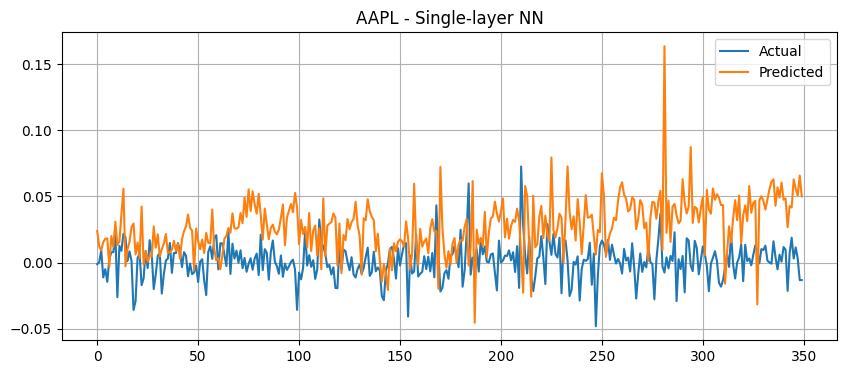

Training MSFT...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


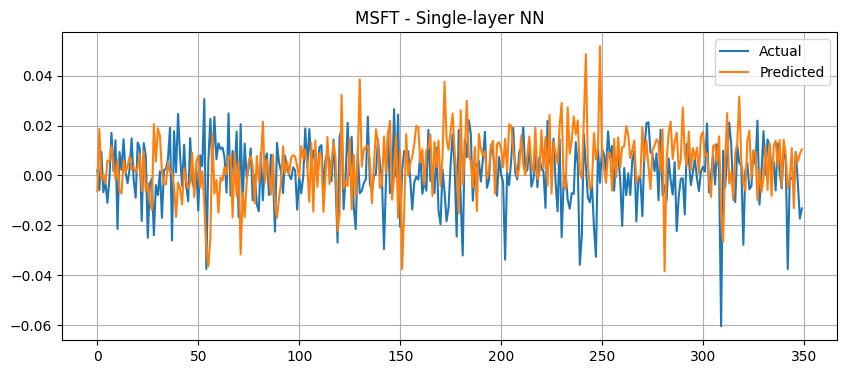

Training JPM...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


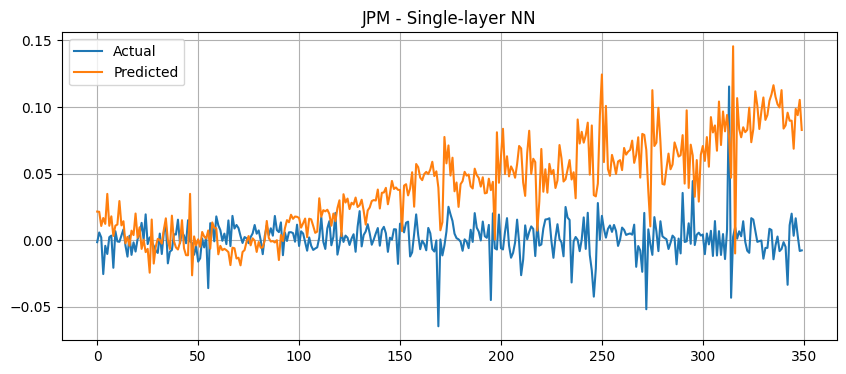

Training BAC...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


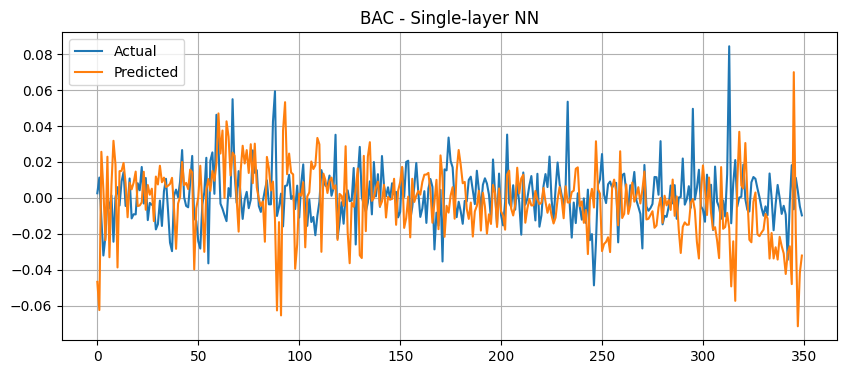

Training XOM...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


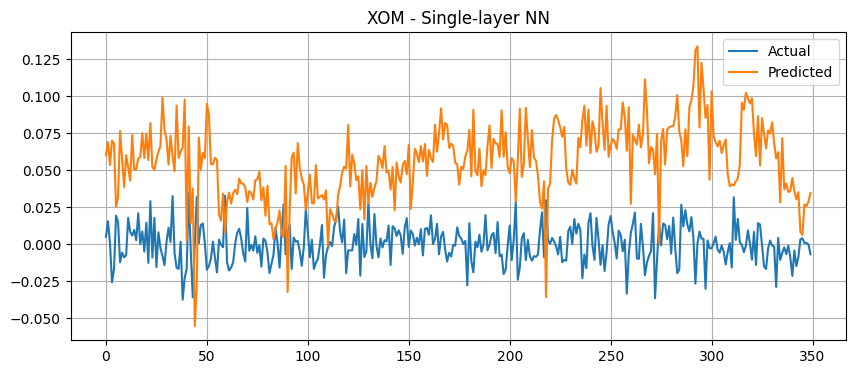

Training CVX...


d:\Dev\stock-forecasting-neural-networks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


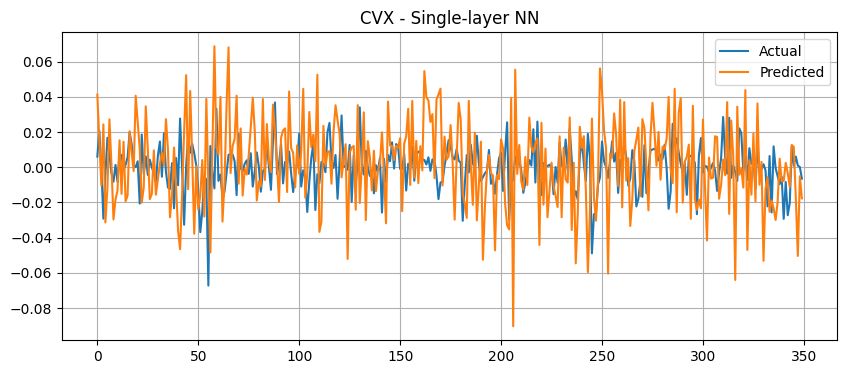

AAPL: MSE = 0.001323, R² = -6.1851
MSFT: MSE = 0.000324, R² = -1.0758
JPM: MSE = 0.002829, R² = -14.5203
BAC: MSE = 0.000609, R² = -1.7346
XOM: MSE = 0.004026, R² = -23.8010
CVX: MSE = 0.000734, R² = -3.5221


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from utils.preprocessing import prepare_data
from utils.evaluation import plot_predictions, compute_metrics
import os


tickers = ['AAPL', 'MSFT', 'JPM', 'BAC', 'XOM', 'CVX']
results = {}

for ticker in tickers:
    print(f"Training {ticker}...")
    df = pd.read_csv(f'../data/processed/{ticker}_processed.csv', index_col='Date', parse_dates=True)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna()
    X = df.drop(columns=['Return'])
    y = df['Return'].shift(-1).dropna()
    X = X.iloc[:-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1, activation='tanh')
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, verbose=0)
    model.save(f'../models/saved_model/{ticker}_single_layer.h5')

    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[ticker] = (mse, r2)

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f"{ticker} - Single-layer NN")
    plt.legend()
    plt.grid(True)
    plt.show()

# Print summary
for ticker, (mse, r2) in results.items():
    print(f"{ticker}: MSE = {mse:.6f}, R² = {r2:.4f}")
